importing all necessary Python libraries used for:

Data handling (pandas, numpy)

Visualization (matplotlib, seaborn)

Machine learning models (Linear Regression, KNN, Decision Tree)

Data preprocessing (scaling, polynomial features)

Model evaluation (R², MSE, MAE)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Loads the housing price dataset from a CSV file.

Displays the first few rows to understand the dataset structure and variables.

In [6]:

df = pd.read_csv('/content/Housing Price.csv')
print("Dataset Head:")
df.head()

Dataset Head:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Converts categorical Yes/No values into numeric form.
yes → 1, no → 0

This step is required because machine learning models work only with numerical data

In [ ]:

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

Converts the categorical variable furnishingstatus into dummy variables.

drop_first=True avoids multicollinearity by removing one category.

In [ ]:

df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

X contains all independent variables (house features).

y contains the target variable (price).
Splits the data into:

80% training data

20% testing data

Ensures the model is evaluated on unseen data.
Creates a dictionary to store the R² score of each model for comparison.

In [ ]:

X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

Uses only the area feature to predict house price.

Trains a simple linear regression model.

Evaluates performance using R² score.

In [ ]:

X_train_simple = X_train[['area']]
X_test_simple = X_test[['area']]

simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)
y_pred_simple = simple_model.predict(X_test_simple)
results['Simple Linear'] = r2_score(y_test, y_pred_simple)

Uses all available features to predict price.

Captures more relationships than simple linear regression.

Stores its R² score for comparison.

In [ ]:

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)
results['Multi-Linear'] = r2_score(y_test, y_pred_multi)

Expands features to include squared and interaction terms.

Helps capture non-linear relationships.

Trains a linear regression model on polynomial features.

In [ ]:

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
results['Polynomial (Deg 2)'] = r2_score(y_test, y_pred_poly)

Scales features because KNN depends on distance.

Uses K = 5 nearest neighbors.

Predicts price based on similarity to nearby houses.

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
results['KNN Regression'] = r2_score(y_test, y_pred_knn)

Builds a tree-based model that splits data based on feature values.

Captures complex, non-linear patterns.

Does not require feature scaling.

In [ ]:

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results['Decision Tree'] = r2_score(y_test, y_pred_dt)

Displays all models and their R² scores.

Sorts models from best to worst performance.

In [ ]:

print("\n" + "="*40)
print("       MODEL PERFORMANCE (R2 Score)")
print("="*40)
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'R2 Score'])
results_df = results_df.sort_values(by='R2 Score', ascending=False)
print(results_df)


       MODEL PERFORMANCE (R2 Score)
                Model  R2 Score
1        Multi-Linear  0.652924
2  Polynomial (Deg 2)  0.620841
3      KNN Regression  0.613420
4       Decision Tree  0.477146
0       Simple Linear  0.272879


Visualizes how well the Multi-Linear Regression model predicts prices.

The closer points are to the red diagonal line, the better the prediction

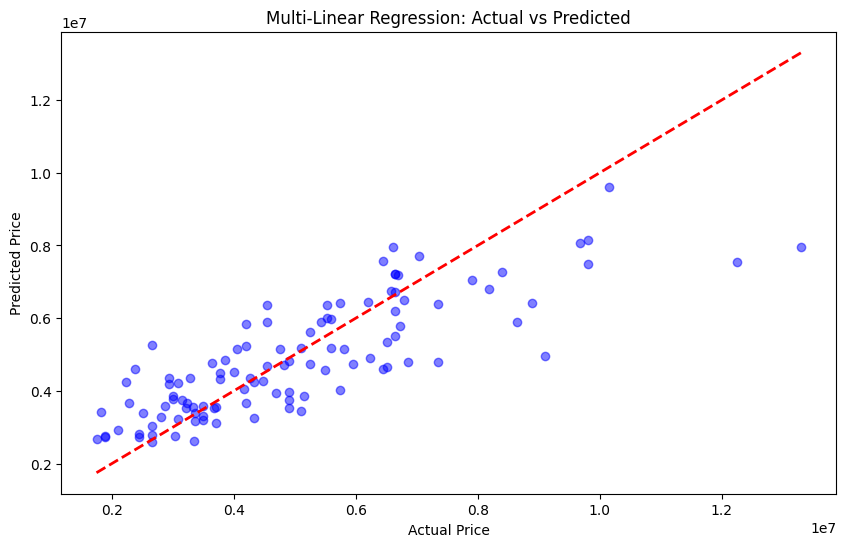

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multi-Linear Regression: Actual vs Predicted')
plt.show()

Defines new house details for price prediction.

Includes two different house examples.

In [ ]:

new_data_input = [
    {
        'area': 6000, 'bedrooms': 3, 'bathrooms': 2, 'stories': 2,
        'mainroad': 'yes', 'guestroom': 'no', 'basement': 'yes',
        'hotwaterheating': 'no', 'airconditioning': 'yes',
        'parking': 2, 'prefarea': 'yes', 'furnishingstatus': 'furnished'
    },
    {
        'area': 3500, 'bedrooms': 2, 'bathrooms': 1, 'stories': 1,
        'mainroad': 'no', 'guestroom': 'no', 'basement': 'no',
        'hotwaterheating': 'no', 'airconditioning': 'no',
        'parking': 0, 'prefarea': 'no', 'furnishingstatus': 'unfurnished'
    }
]

Applies the same preprocessing steps used in training.

Ensures feature alignment with training data.

In [ ]:

df_new = pd.DataFrame(new_data_input)

In [ ]:

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_new[col] = df_new[col].map({'yes': 1, 'no': 0})

In [ ]:
df_new = pd.get_dummies(df_new, columns=['furnishingstatus'], drop_first=True)

In [ ]:
df_new = df_new.reindex(columns=X.columns, fill_value=0)

print("\nNew Data for Prediction:")
df_new.head()


New Data for Prediction:


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6000,3,2,2,1,0,1,0,1,2,1,0,False
1,3500,2,1,1,0,0,0,0,0,0,0,0,True


Predicts house prices using:

Multiple Linear Regression

Polynomial Regression

KNN Regression

Decision Tree Regression

Allows comparison of predictions across different models.

In [ ]:

print("\n" + "="*30)
print("       PREDICTIONS")
print("="*30)


pred_multi = multi_model.predict(df_new)
print(f"Multi-Linear Predictions: {pred_multi}")

df_new_poly = poly.transform(df_new)
pred_poly = poly_model.predict(df_new_poly)
print(f"Polynomial Predictions:   {pred_poly}")
df_new_scaled = scaler.transform(df_new)
pred_knn = knn_model.predict(df_new_scaled)

print(f"KNN Predictions:          {pred_knn}")
pred_dt = dt_model.predict(df_new)
print(f"Decision Tree Predictions:{pred_dt}")


       PREDICTIONS
Multi-Linear Predictions: [7539196.3035004  2327756.89562834]
Polynomial Predictions:   [8067373.45854874 2740331.66314217]
KNN Predictions:          [8876000. 2654400.]
Decision Tree Predictions:[8540000. 3115000.]
